# Stroke Prediction

## Introduction

We will predict strokes with these data.

Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes

- Risk factors for having a stroke include

- Age: People aged 55 years and over

- Hypertension: if the systolic pressure is 140 mm Hg or more, or the diastolic pressure is 90 mm Hg or more

- Hypercholesterolemia: If the cholesterol level in the blood is 200 milligrams per deciliter

- Smoking

- Diabetes

- Obesity: if the body mass index (BMI) is 30 or more

### About Data

* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

## 2. Importing Data

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = stroke_data.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print("Info: \n", df.info(), "\n---------------")
print("Describe: \n", df.describe().T, "\n---------------")
print("Null: \n", df.isnull().sum(), "\n---------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
Info: 
 None 
---------------
Describe: 
                     count          mean           std    min        25%  \
id                 5110.0  36517.829354 

In [4]:
df.drop(['id'], axis = 1, inplace=True)

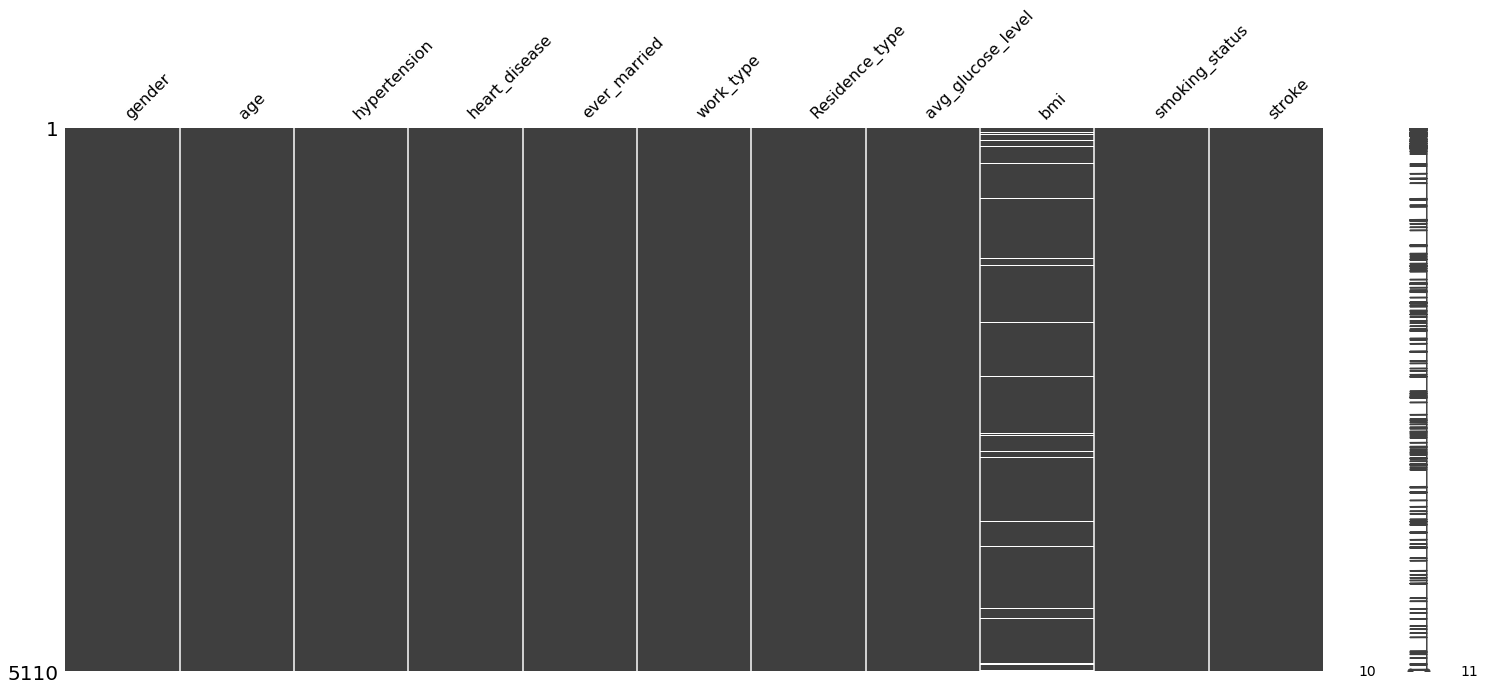

In [5]:
import missingno as msno

msno.matrix(df);

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### There are null values present in 'bmi'.

In [7]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

##### We replaced null values of 'bmi' with mean in that column.

In [8]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 3. Data Visualization 

##### Count Plot

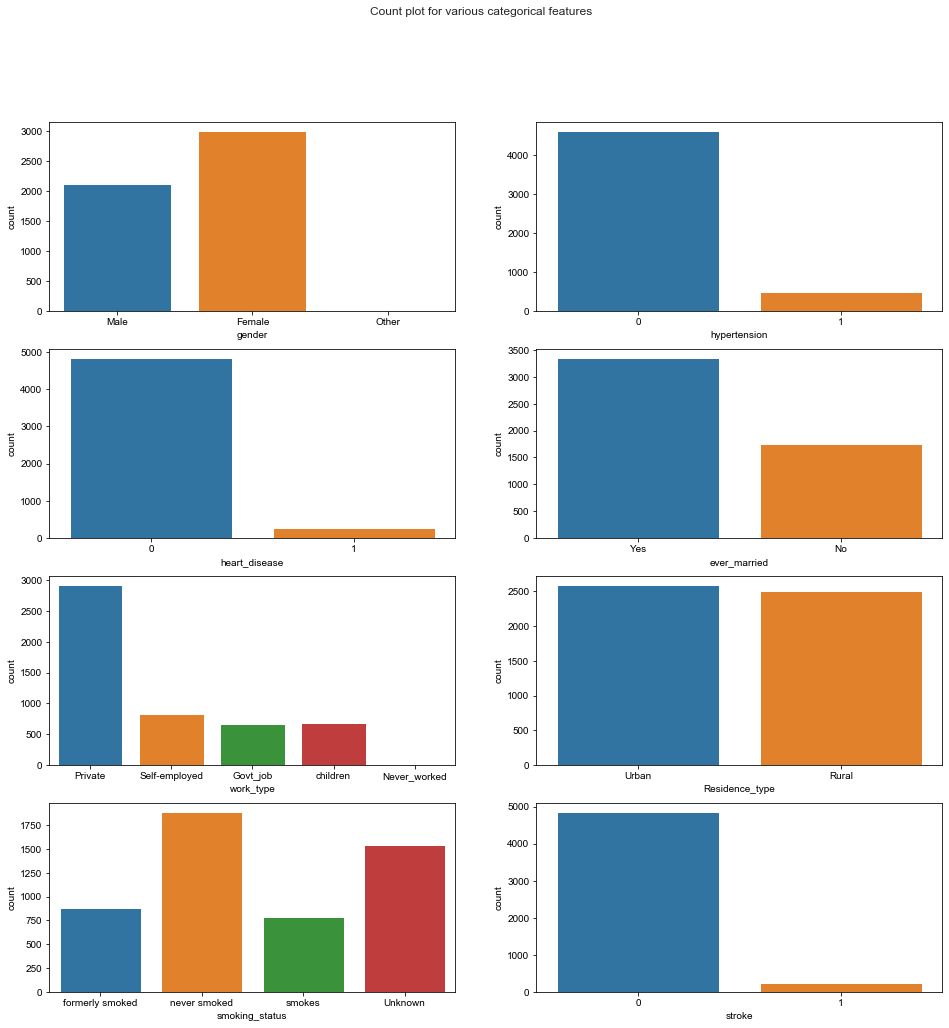

In [9]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

##### Stroke

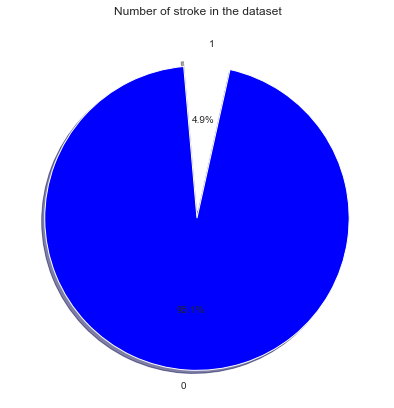

In [10]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["blue","white"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=95,)

plt.title('Number of stroke in the dataset')
plt.show()

##### Age

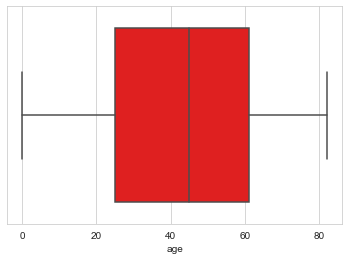

In [11]:
sns.boxplot(x='age',data=df , color = 'red');

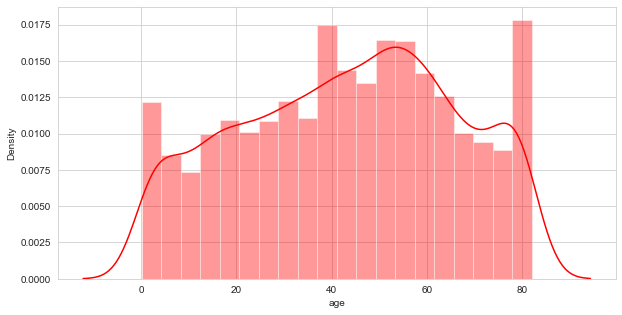

In [12]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df.age, color="red", label="age", kde= True)
plt.show()

##### Avg. Glucose Level 

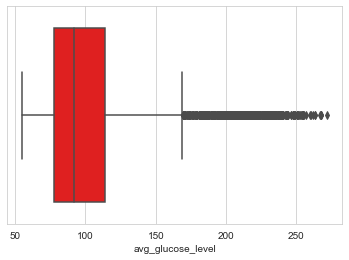

In [13]:
sns.boxplot(x='avg_glucose_level',data=df , color = 'red');

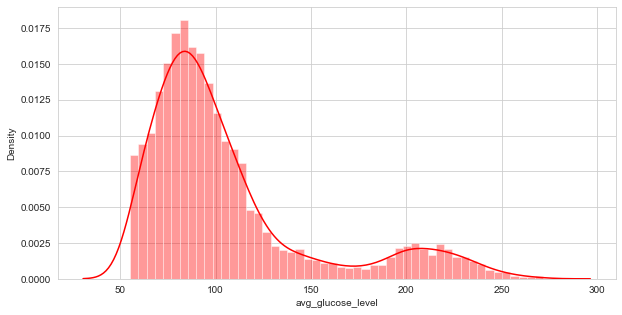

In [14]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df.avg_glucose_level, color="red", label="avg_glucose_level", kde= True)
plt.show()

##### BMI

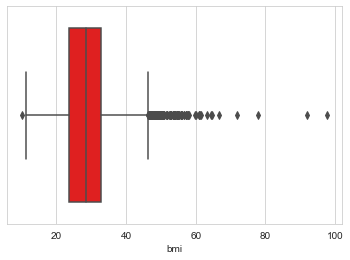

In [15]:
sns.boxplot(x='bmi',data=df , color = 'red');

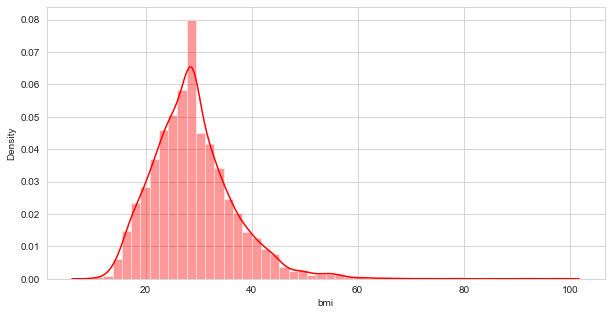

In [16]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df.bmi, color="red", label="bmi", kde= True)
plt.show()

##### Correlation

In [17]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


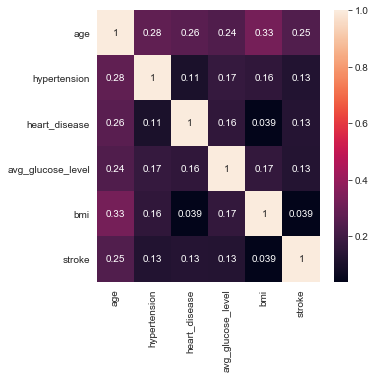

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True);

##### Crossings

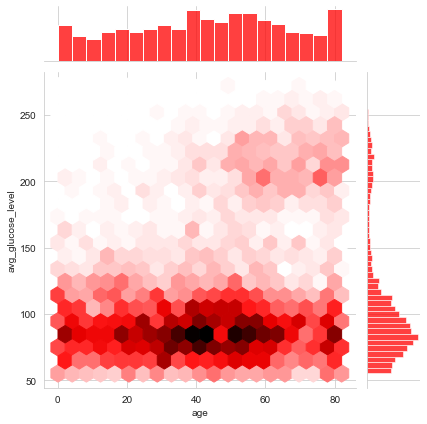

In [19]:
sns.jointplot(x = 'age', y = 'avg_glucose_level', data = df, kind = 'hex', color="r", gridsize = 20);

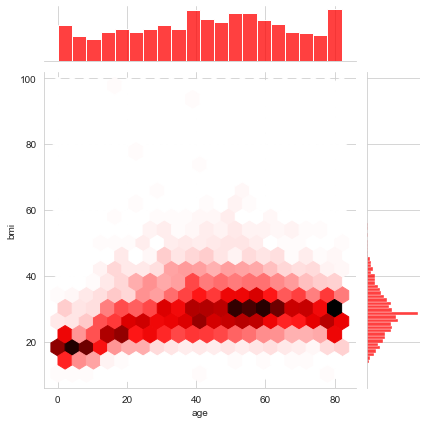

In [20]:
sns.jointplot(x = 'age', y = 'bmi', data = df, kind = 'hex', color="r", gridsize = 20);

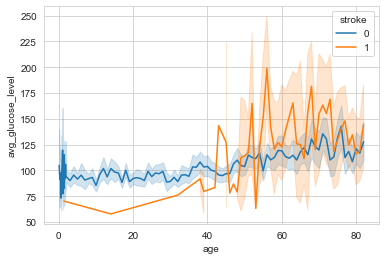

In [21]:
sns.lineplot(x = "age", y = "avg_glucose_level", hue = "stroke", data = df);

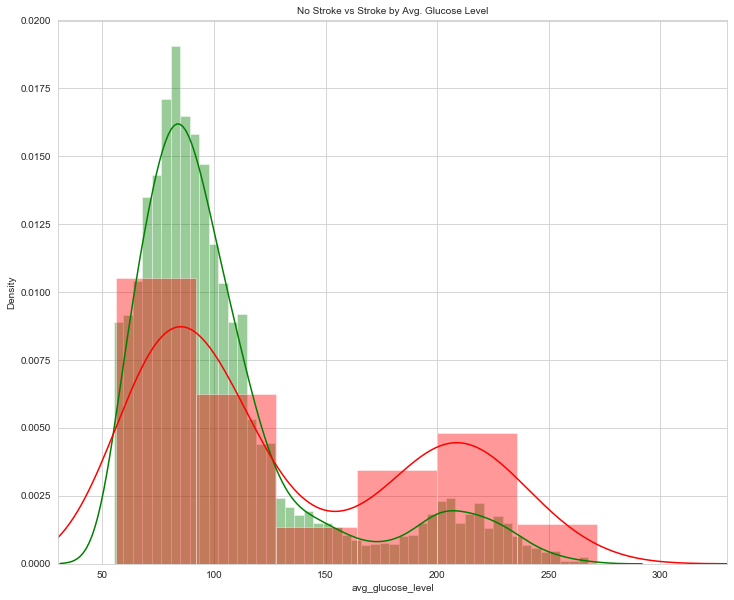

In [22]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=10)
plt.xlim([30,330])
plt.show()

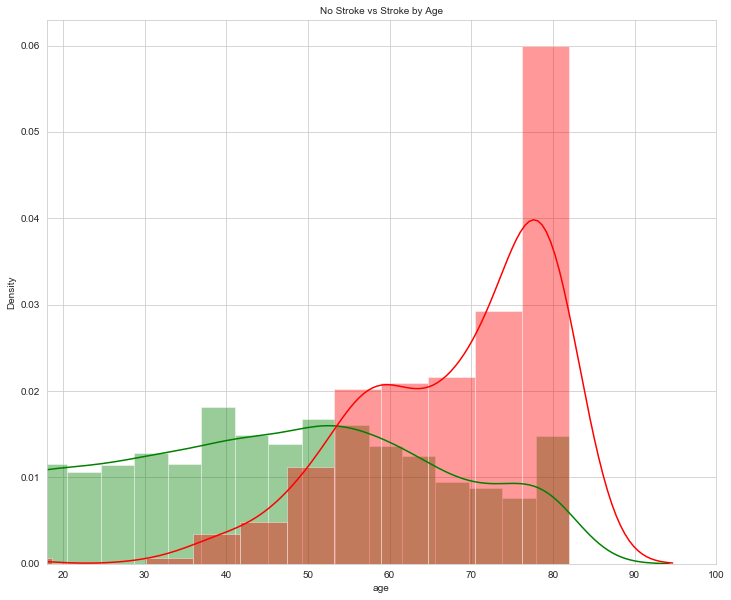

In [23]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=10)
plt.xlim([18,100])
plt.show()

##### Scatter Plot

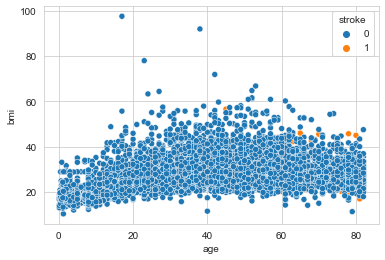

In [24]:
sns.scatterplot(x = "age", y = "bmi", hue= "stroke", data = df);

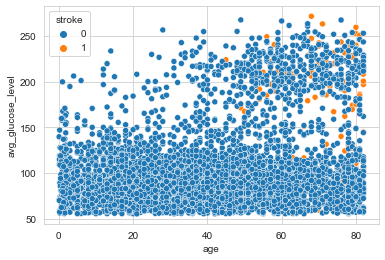

In [25]:
sns.scatterplot(x = "age", y = "avg_glucose_level", hue= "stroke", data = df);

##### Pair Plot

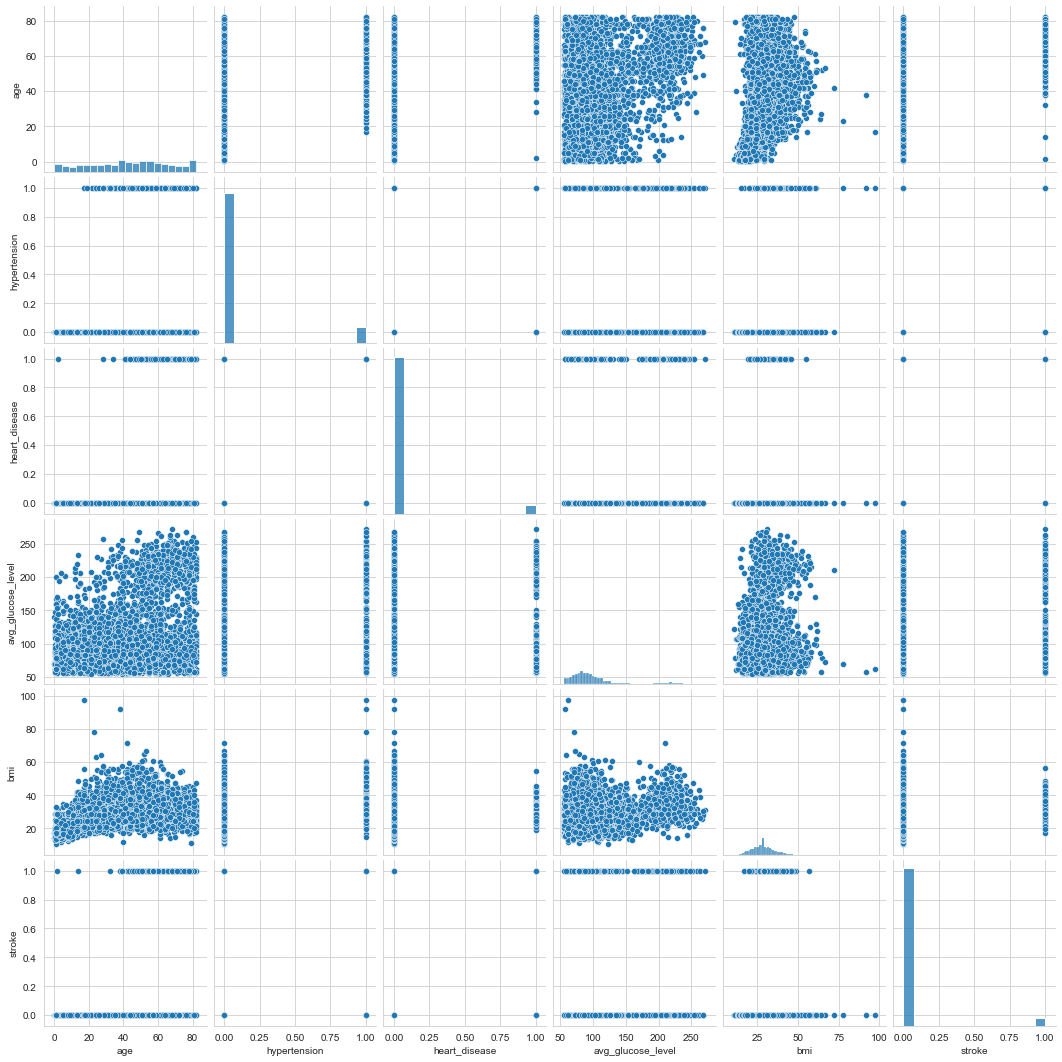

In [26]:
sns.pairplot(df);

##### Violin Plot

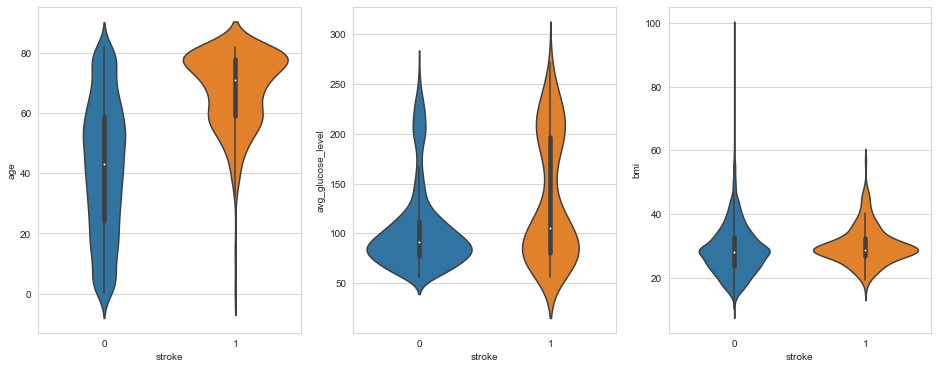

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'stroke', y = 'age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'stroke', y = 'bmi', data = df)
plt.show();

###### EDA Sonuçları

* Verilere göre inme ile cinsiyet arasında yeterki açıklayıcılık yok ancak erkeklerde inme oranı daha yüksek.
* Yaş ve inme arasında güçlü bir ilişki bulunmakta ancak anlamlılık için tek başına yeterli değil.
* Kalp hastalıkları ve hipertansiyon inme riskini önemli ölçüde arttırmakta.
* Sigara ve inme arasında yeterli ilişki bulunmamakta ancak sigara kullanımı kalp ve damar hastalıklarına yol açıktığı için dolaylı yoldan etkilemektedir.

## 4. Data Preprocessing 

In [28]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [29]:
numerical = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
categorical = X.select_dtypes(include = ['object']).columns.to_list()

##### Label Encoder

In [30]:
def label_encoder(df):
    for i in categorical:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

##### Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler()
X[numerical] = sc.fit_transform(X[numerical])

# Label encoding
X = label_encoder(X)

X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.051434,-0.328602,4.185032,1,2,1,2.706375,1.001234e+00,1
1,0,0.786070,-0.328602,-0.238947,1,3,0,2.121559,1.384666e-15,2
2,1,1.626390,-0.328602,4.185032,1,2,0,-0.005028,4.685773e-01,2
3,0,0.255342,-0.328602,-0.238947,1,2,1,1.437358,7.154182e-01,3
4,0,1.582163,3.043196,-0.238947,1,3,0,1.501184,-6.357112e-01,2


##### SMOTE (Synthetic Minority Over-sampling Technique)

In [32]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

smote = SMOTE()

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

## 5. Modelling

##### Logistic Regression

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       967
           1       0.15      0.69      0.25        55

    accuracy                           0.77      1022
   macro avg       0.56      0.73      0.56      1022
weighted avg       0.93      0.77      0.83      1022

ROC AUC score: 0.824

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.872
precision: 0.78
recall: 0.83
f1: 0.8


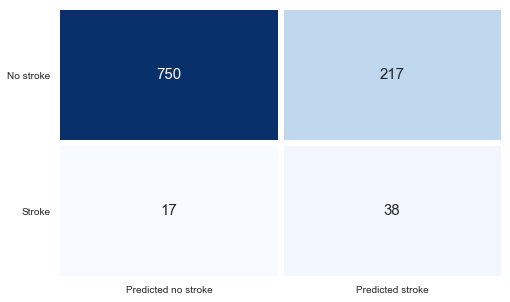

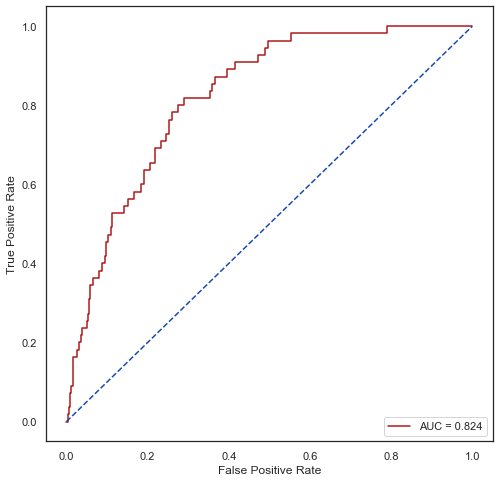

In [33]:
lg = LogisticRegression(random_state = 22)
lg.fit(X_train_balanced, Y_train_balanced)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

results = pd.DataFrame(columns = ['SVC', 'KNN', 'LR', 'RF', 'XGB', 'LGBM'], index = range(4))

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### KNN

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       967
           1       0.10      0.36      0.16        55

    accuracy                           0.79      1022
   macro avg       0.53      0.59      0.52      1022
weighted avg       0.91      0.79      0.84      1022

ROC AUC score: 0.684

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.946
precision: 0.83
recall: 0.98
f1: 0.9


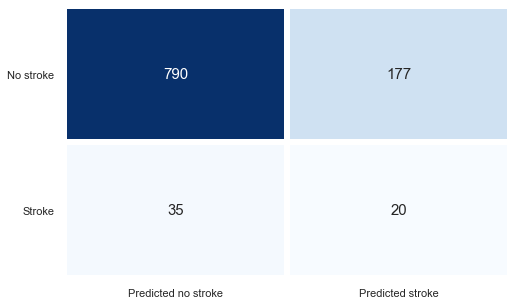

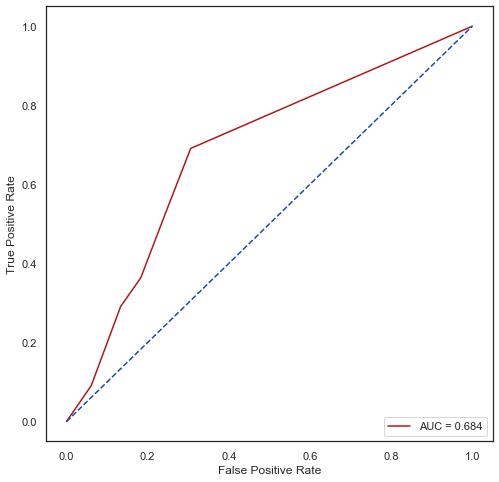

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, Y_train_balanced)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
knn_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(knn_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       967
           1       0.14      0.76      0.24        55

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.74      0.81      1022

ROC AUC score: 0.819

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.911
precision: 0.77
recall: 0.9
f1: 0.83


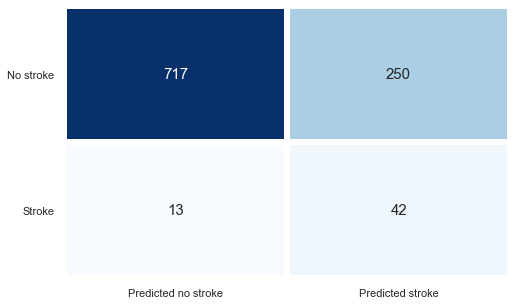

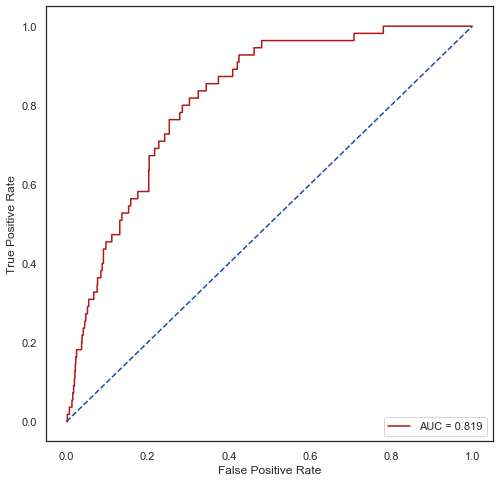

In [35]:
rf = RandomForestClassifier(random_state = 22, max_depth = 5)
rf.fit(X_train_balanced, Y_train_balanced)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### SVC

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       967
           1       0.15      0.58      0.23        55

    accuracy                           0.79      1022
   macro avg       0.56      0.69      0.56      1022
weighted avg       0.93      0.79      0.85      1022

ROC AUC score: 0.788

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.919
precision: 0.81
recall: 0.9
f1: 0.86


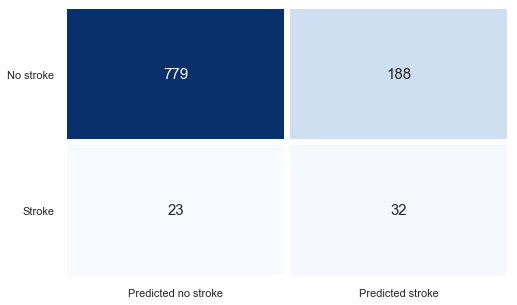

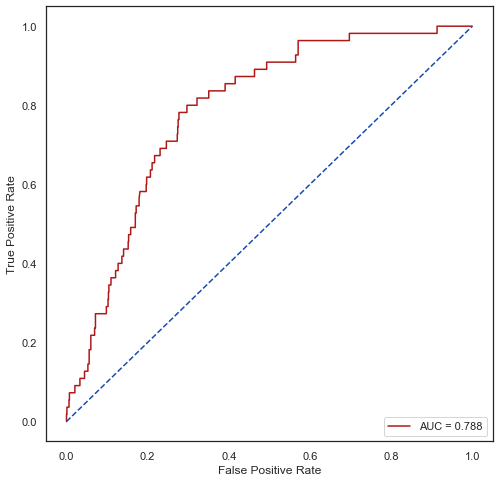

In [36]:
svc = SVC(random_state = 22, probability = True)
svc.fit(X_train_balanced, Y_train_balanced)
y_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)
svc_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(svc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Thank you for looking.